In [73]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
from sklearn.neighbors import KNeighborsClassifier


### Read the input file and check the data dimension

In [74]:
df = pd.read_csv('german_credit.csv')
df.shape

(1000, 21)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [76]:
df.isnull().values.any()

False

In [77]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [78]:
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [79]:
from scipy.stats import zscore
#X = df.drop('default',axis=1)
#Y = df['default']
X = df

In [80]:
x_train, y_train = train_test_split(X, test_size=0.5, random_state=0)

In [81]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [82]:
# Print Shape of model data
x_train.shape

(500, 21)

In [83]:
x_train = pd.get_dummies(x_train, drop_first = True)
x_train.T

,631,185,732,404,194,564,401,530,656,441,...,723,9,359,707,763,835,192,629,559,684
default,1,0,0,0,1,0,0,0,1,0,...,0,1,1,1,1,1,1,0,1,0
duration_in_month,18,15,8,18,45,24,18,36,12,12,...,9,30,30,12,21,12,27,9,18,36
credit_amount,1553,1360,760,2899,3031,4712,1887,2273,888,1620,...,790,5234,2406,2969,12680,1082,3915,3832,1928,9857
installment_as_income_perc,4,4,4,4,4,4,4,3,4,2,...,4,4,4,4,4,4,4,1,2,1
present_res_since,3,2,2,4,4,2,4,1,4,3,...,3,2,4,3,4,4,2,4,2,3
age,44,31,44,43,21,37,28,32,41,30,...,66,28,23,25,30,48,36,64,31,31
credits_this_bank,1,2,1,1,1,2,2,2,1,1,...,1,2,1,2,1,2,1,1,2,2
people_under_maintenance,1,1,1,2,1,1,1,2,2,1,...,1,1,1,1,1,1,2,1,1,2
account_check_status_< 0 DM,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
account_check_status_>= 200 DM / salary assignments for at least 1 year,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Check for highly correlated variables but don't required any treatment for this use case

In [84]:
corr = x_train.corr()
corr

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
default,1.000000,0.196757,0.150186,0.065731,0.007988,-0.078169,0.005401,0.016450,0.313346,-0.086133,...,0.143887,-0.091208,0.093631,-0.155688,0.144401,-0.053846,-0.024683,0.052718,-0.022039,1.113589e-01
duration_in_month,0.196757,1.000000,0.615026,0.062245,0.050901,-0.111937,-0.005528,-0.027555,0.006168,-0.115705,...,0.166270,-0.020570,0.048471,-0.082217,0.015097,0.083521,-0.050103,-0.180103,0.197120,1.736516e-01
credit_amount,0.150186,0.615026,1.000000,-0.277692,0.029636,-0.027383,-0.015795,-0.007862,-0.063799,-0.122691,...,0.252724,-0.036791,0.000445,-0.137395,0.037808,-0.052655,-0.064285,-0.172640,0.321111,1.335528e-01
installment_as_income_perc,0.065731,0.062245,-0.277692,1.000000,0.107459,0.048377,0.039409,-0.070694,0.089802,-0.063392,...,-0.048442,0.018514,0.066099,0.064945,-0.042324,-0.000400,-0.150588,0.009776,-0.006303,3.166327e-02
present_res_since,0.007988,0.050901,0.029636,0.107459,1.000000,0.264379,0.071516,0.041924,0.096699,-0.034648,...,0.201313,-0.005464,-0.060685,-0.336379,0.205708,-0.021816,-0.019553,0.003845,0.123851,1.027436e-01
age,-0.078169,-0.111937,-0.027383,0.048377,0.264379,1.000000,0.091953,0.090087,-0.025732,0.041800,...,0.165516,-0.068849,0.026968,-0.003220,-0.158371,-0.155089,0.072625,0.062905,0.073631,1.111594e-02
credits_this_bank,0.005401,-0.005528,-0.015795,0.039409,0.071516,0.091953,1.000000,0.091060,-0.012358,-0.055914,...,-0.034229,-0.123013,0.064067,0.028325,-0.010548,0.049497,0.055861,-0.056974,0.009071,-1.010496e-02
people_under_maintenance,0.016450,-0.027555,-0.007862,-0.070694,0.041924,0.090087,0.091060,1.000000,-0.006441,0.033772,...,0.086335,-0.075890,-0.057565,-0.032835,-0.108782,-0.079717,0.007507,0.104397,-0.007848,-3.669382e-02
account_check_status_< 0 DM,0.313346,0.006168,-0.063799,0.089802,0.096699,-0.025732,-0.012358,-0.006441,1.000000,-0.160846,...,0.067104,-0.052600,0.068340,-0.164016,0.147221,0.004117,0.043017,0.016790,-0.051259,-1.474760e-02
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.086133,-0.115705,-0.122691,-0.063392,-0.034648,0.041800,-0.055914,0.033772,-0.160846,1.000000,...,-0.001830,0.029427,-0.017753,-0.021024,0.004061,-0.039046,0.057808,0.025214,-0.035633,-6.906027e-02


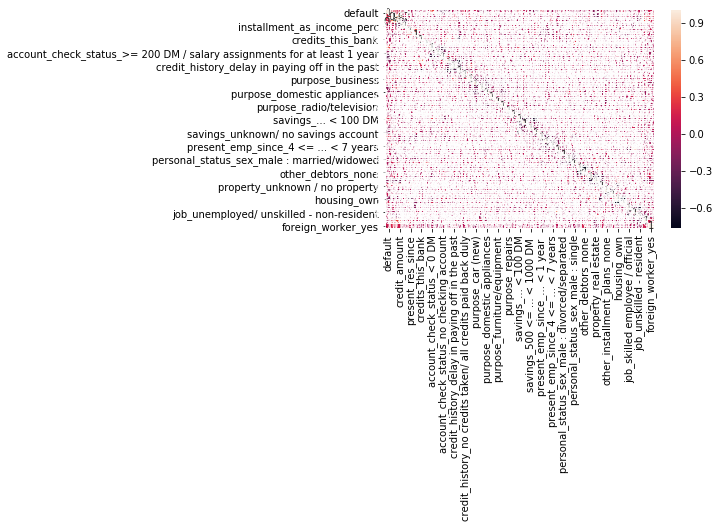

In [85]:
sns.heatmap(corr, annot=True)

### Drop the original variables which are converted to dummy

In [87]:
df.drop(['account_check_status',
'credit_history',
'purpose',
'savings',
'present_emp_since',
'personal_status_sex',
'other_debtors',
'property',
'other_installment_plans',
'housing',
'job',
'telephone',
'foreign_worker'],axis=1,inplace=True)

In [88]:
df.shape

(1000, 8)

In [89]:
df.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,0,6,1169,4,4,67,2,1
1,1,48,5951,2,2,22,1,1
2,0,12,2096,2,3,49,1,2
3,0,42,7882,2,4,45,1,2
4,1,24,4870,3,4,53,2,2


In [132]:
df.dropna(inplace=True)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [160]:
X = df.drop('default',axis=1)
Y = df[['default']]
X = X.apply(zscore)

In [161]:
X.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869


In [162]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics,svm
from sklearn import preprocessing
from sklearn import utils

In [171]:

parameter={'n_estimators': np.arange(1,10), 'max_depth':np.arange(1,10),'criterion' : ['entropy','gini']}  
GS=GridSearchCV(rf_model,parameter,cv=3)                                          
GS.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [172]:
gs_pred=GS.predict(x_test)
metrics.accuracy_score(y_test,gs_pred)
GS.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 2}

In [173]:
rf_model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [176]:
Y_predict=rf_model.predict(x_test)
cm=metrics.confusion_matrix(y_test,Y_predict)
cm

array([[188,  26],
       [ 61,  25]], dtype=int64)

In [177]:
y_pred=rf_model.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.71

### Q6 Show the list of the features importance( 1 Marks)

In [180]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
credit_amount,0.335237
age,0.245015
duration_in_month,0.194081
present_res_since,0.081825
installment_as_income_perc,0.067107
credits_this_bank,0.049429
people_under_maintenance,0.027305


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [181]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [185]:
# Use below values
num_folds = 10
seed = 77

In [186]:
#Validate the Random Forest model build above using k fold

In [187]:
models = []
models.append(('RandomForest', rf_model))

RandomForest: 0.275143 (0.008349)


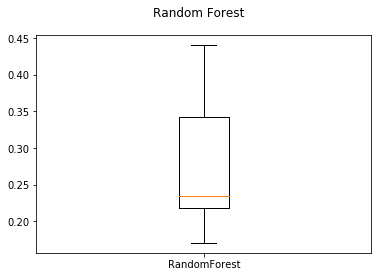

In [190]:
results = []
names = []
scoring = 'recall'
for name, model in models:
	kfold = model_selection.KFold(n_splits=num_folds,random_state=seed)
	cv_results = model_selection.cross_val_score(model, X,Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Random Forest')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [195]:
results

[array([0.44      , 0.21875   , 0.2173913 , 0.35714286, 0.25      ,
        0.17073171, 0.3       , 0.40625   , 0.17241379, 0.21875   ])]

In [0]:
#Calculate Mean score

In [196]:
np.mean(results)

0.2751429661911205

In [0]:
# Calculate score standard deviation using std()

In [197]:
np.std(results)

0.09137368363235293

In [231]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf_model, X = x_test, y = y_test, cv = num_folds)
print(accuracies.mean())
print(accuracies.std())

0.6807230255839821
0.05849405405943697


# Q8 Print the confusion matrix( 1 Marks)

In [233]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(estimator = rf_model, X = x_test, y = y_test, cv = num_folds)
conf_mat = confusion_matrix(y_test, y_pred)

#Confusion Matrix
conf_mat

array([[192,  22],
       [ 74,  12]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [235]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))

#print(metrics.confusion_matrix(y_train, y_pred))

TP = conf_mat[1, 1]
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]

#TP = 12
#TN = 192
#FP = 22
#FN = 74

print(' Percentage of correct predictions:  ',((TP + TN) / float(TP + TN + FP + FN) * 100))

0.68
Accuracy: 0.68 (+/- 0.12)
 Percentage of correct predictions:   68.0


In [237]:
#Sensitivity
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.13953488372093023
0.13953488372093023


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

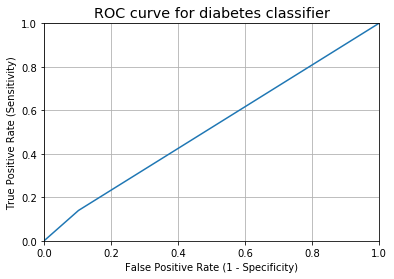

In [238]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [239]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred))

0.5183655727015866


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [241]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [243]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(x_train, y_train)
    rf_model.fit(X_, y_)
    y_pred = rf_model.predict(x_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [244]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6973333333333332
Standard deviation:  0.009637888196533988
